# Business Case: Delhivery - Feature Engineering
## About Delhivery
- Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

`How can you help here?`

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

## Loading the Dataset

In [ ]:
!gdown 1NI0WM7u_y5Lj1NbMdiL8SbRXSZihP47G

Downloading...
From: https://drive.google.com/uc?id=1NI0WM7u_y5Lj1NbMdiL8SbRXSZihP47G
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:01<00:00, 39.7MB/s]


## Preliminary Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/delhivery_data.csv')

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

In [ ]:
for i in df.columns:
  print(f'The number of unique values in column {i:<30}  {df[i].nunique()}')

The number of unique values in column data                            2
The number of unique values in column trip_creation_time              14817
The number of unique values in column route_schedule_uuid             1504
The number of unique values in column route_type                      2
The number of unique values in column trip_uuid                       14817
The number of unique values in column source_center                   1508
The number of unique values in column source_name                     1498
The number of unique values in column destination_center              1481
The number of unique values in column destination_name                1468
The number of unique values in column od_start_time                   26369
The number of unique values in column od_end_time                     26369
The number of unique values in column start_scan_to_end_scan          1915
The number of unique values in column actual_distance_to_destination  144515
The number of unique valu

In [ ]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [ ]:
floating_columns = df.select_dtypes(include = 'float64').columns
for i in floating_columns:
  print(df[i].max())

7898.0
1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003


In [ ]:
for i in floating_columns:
  df[i] = df[i].astype('float32')

In [ ]:
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

In [ ]:
df['trip_creation_time'].min(), df['od_end_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-08 03:00:24.353479'))

## Basic Data Cleaning and Exploration

### Handle missing values in the data.

In [ ]:
np.any(df.isnull())

True

In [ ]:
print(df.isnull().sum())

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64


In [ ]:
df['destination_name'].fillna('Unknown', inplace = True)
df['source_name'].fillna('Unknown', inplace = True)

In [ ]:
print(df.isnull().sum())

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64


In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262939,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1037.012817,344.990021,598.103638,308.011078,421.119293,53.571156,14.775960,17.860661


In [ ]:
df.describe(include = 'object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1499,1481,1469
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


## Merging of rows and aggregation of fields

Since delivery details of one package is divided into several rows (think of it as connecting flights to reach a particular destination).
Now think about...
- How should we treat their fields if we combine these rows?
- What aggregation would make sense if we merge?
- What would happen to the numeric fields if we merge the rows?

In [ ]:
#Grouping by segment
segment_key = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(segment_key)[['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']].cumsum()
df1

,segment_actual_time,segment_osrm_distance,segment_osrm_time
0,14.0,11.965300,11.0
1,24.0,21.724300,20.0
2,40.0,32.539497,27.0
3,61.0,45.561897,39.0
4,67.0,49.477200,44.0
...,...,...,...
144862,92.0,65.348701,94.0
144863,118.0,82.721199,115.0
144864,138.0,103.426498,149.0
144865,155.0,122.315002,176.0


In [ ]:
#Aggregating at segment level
create_segment_dict = {'data' : 'first',
                        'route_type' : 'first',
                        'trip_creation_time' : 'first',
                        'source_name' : 'first',
                        'destination_name' : 'last',
                        'od_start_time' : 'first',
                        'od_end_time' : 'first',
                        'start_scan_to_end_scan' : 'first',
                        'actual_distance_to_destination' : 'last',
                        'actual_time' : 'last',
                        'osrm_time' : 'last',
                        'osrm_distance' : 'last',
                        'segment_actual_time' : 'sum',
                        'segment_osrm_time' : 'sum',
                        'segment_osrm_distance' : 'sum'}
df2 = df.groupby(segment_key, as_index = False).agg(create_segment_dict)
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300


In [ ]:
df2 = df2.sort_values(by = segment_key + ['od_end_time'], ascending = True)
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26364,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26365,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26366,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300


## Feature Engineering
Extract features from the below fields:
1. Calculate time taken between od_start_time and od_end_time and keep it as a
feature named od_time_diff_hour. Drop the original columns, if required.
2. Destination Name: Split and extract features out of destination. City-place-code
(State)
3. Source Name: Split and extract features out of destination. City-place-code
(State)
4. Trip_creation_time: Extract features like month, year, day, etc.

### Calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour. Drop the original columns, if required.

In [ ]:
df2['od_total_time'] = df2['od_end_time'] - df2['od_start_time']
df2.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df2['od_total_time'] = df2['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df2['od_total_time'].head()

,od_total_time
0,1260.60
1,999.51
2,58.83
3,122.78
4,834.64


### Destination Name: Split and extract features out of destination. City-place-code (State)

In [ ]:
def get_state(x):
  l = x.split('(')
  if len(l) == 0:
    return l[0]
  else:
    return l[-1].replace(')', '')

In [ ]:
df2['destination_state'] = df2['destination_name'].apply(get_state)
df2['destination_state'].unique()

array(['Haryana', 'Uttar Pradesh', 'Karnataka', 'Punjab', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Andhra Pradesh', 'Telangana',
       'Rajasthan', 'Madhya Pradesh', 'Assam', 'West Bengal',
       'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa', 'Uttarakhand',
       'Bihar', 'Jharkhand', 'Pondicherry', 'Goa', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Meghalaya', 'Nagaland', 'Tripura', 'Unknown',
       'Daman & Diu'], dtype=object)

In [ ]:
def get_city(x):
  if 'Unknown' in x:
    return 'Unknown City'
  else:
    l = x.split('_')
    return l[0]

In [ ]:
df2['destination_city'] = df2['destination_name'].apply(get_city)
df2['destination_city'].unique()

array(['Gurgaon', 'Kanpur', 'Chikblapur', ..., 'Ranaghat', 'Kapadvanj',
       'Lunawada'], dtype=object)

### Source Name: Split and extract features out of destination. City-place-code (State)

In [ ]:
df2['source_state'] = df2['source_name'].apply(get_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka', 'Haryana',
       'Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana',
       'Andhra Pradesh', 'Rajasthan', 'Assam', 'West Bengal', 'Punjab',
       'Chandigarh', 'Goa', 'Uttarakhand', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Himachal Pradesh', 'Kerala', 'Arunachal Pradesh',
       'Bihar', 'Meghalaya', 'Chhattisgarh', 'Jammu & Kashmir',
       'Dadra and Nagar Haveli', 'Mizoram', 'Tripura', 'Nagaland',
       'Unknown'], dtype=object)

In [ ]:
df2['source_city'] = df2['source_name'].apply(get_city)
df2['source_city'].unique()

array(['Kanpur', 'Bhopal', 'Doddablpur', ..., 'Mahasamund', 'Badkulla',
       'Kapadvanj'], dtype=object)

### Trip_creation_time: Extract features like month, year, day, etc.

In [ ]:
df2['trip_creation_time'].head()

,trip_creation_time
0,2018-09-12 00:00:16.535741
1,2018-09-12 00:00:16.535741
2,2018-09-12 00:00:22.886430
3,2018-09-12 00:00:22.886430
4,2018-09-12 00:00:33.691250


In [ ]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

,trip_creation_date
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12


In [ ]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

,trip_creation_month
0,9
1,9
2,9
3,9
4,9


In [ ]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

,trip_creation_day
0,12
1,12
2,12
3,12
4,12


In [ ]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

,trip_creation_year
0,2018
1,2018
2,2018
3,2018
4,2018


In [ ]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

,trip_creation_week
0,37
1,37
2,37
3,37
4,37


In [ ]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

,trip_creation_hour
0,0
1,0
2,0
3,0
4,0


In [ ]:
df2.shape

(26368, 27)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       26368 non-null  object        
 1   source_center                   26368 non-null  object        
 2   destination_center              26368 non-null  object        
 3   data                            26368 non-null  category      
 4   route_type                      26368 non-null  category      
 5   trip_creation_time              26368 non-null  datetime64[ns]
 6   source_name                     26368 non-null  object        
 7   destination_name                26368 non-null  object        
 8   start_scan_to_end_scan          26368 non-null  float32       
 9   actual_distance_to_destination  26368 non-null  float32       
 10  actual_time                     26368 non-null  float32       
 11  os

## In-depth analysis

### Grouping and Aggregating at Trip-level

I am intrested to know how many trips are created on the hourly basis

In [ ]:
dt_hour = df2.groupby('trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
dt_hour.head()

,trip_creation_hour,trip_uuid
0,0,1946
1,1,1569
2,2,1296
3,3,1061
4,4,1022


[]

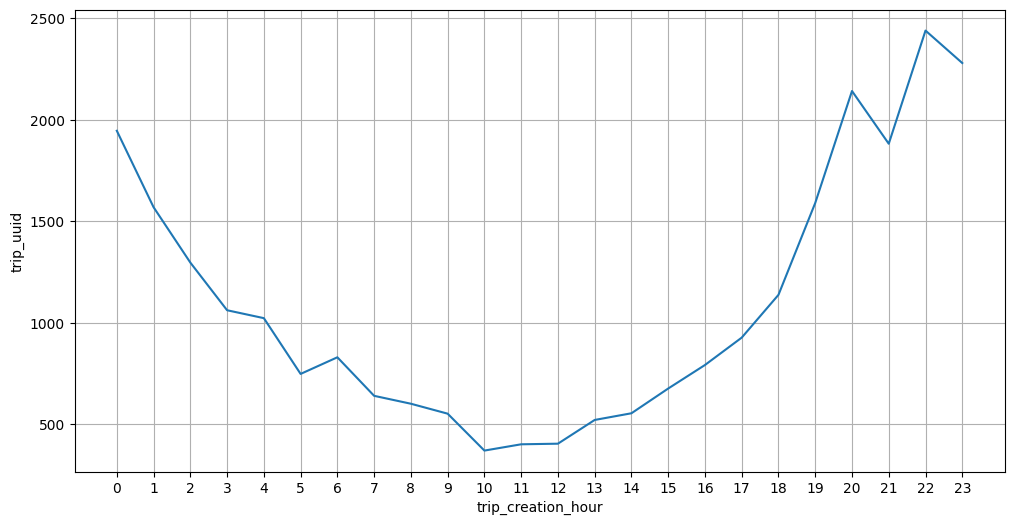

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'trip_creation_hour', y = 'trip_uuid', data = dt_hour)
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.plot()

- It can be inferred from the above plot that the number of trips start increasing after the noon, becomes maximum at 10 P.M and then start decreasing.

I am intrested to know how many trips are created for different days of the month

In [ ]:
df2['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

In [ ]:
dt_day = df2.groupby('trip_creation_day')['trip_uuid'].count().reset_index()
dt_day.head()

,trip_creation_day,trip_uuid
0,1,1050
1,2,1031
2,3,1128
3,12,1290
4,13,1320


[]

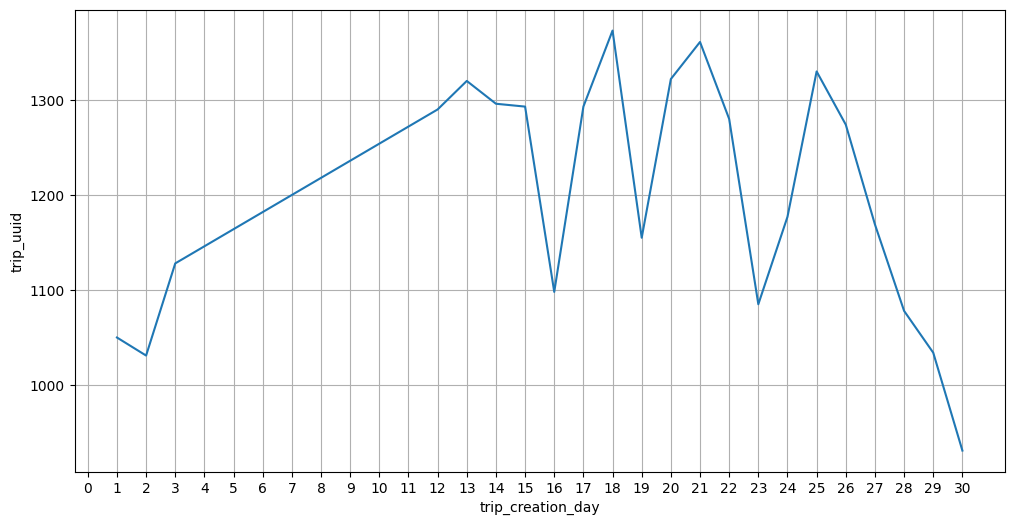

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'trip_creation_day', y = 'trip_uuid', data = dt_day)
plt.xticks(np.arange(0,31))
plt.grid('both')
plt.plot()

- It can be inferred from the above plot that most of the trips are created in the mid of the month.
- That means customers usually make more orders in the mid of the month.

I am intrested to know how many trips are created for different weeks

In [ ]:
df2['trip_creation_week'].unique()

array([37, 38, 39, 40], dtype=int8)

In [ ]:
dt_week = df2.groupby('trip_creation_week')['trip_uuid'].count().reset_index()
dt_week.head()

,trip_creation_week,trip_uuid
0,37,6297
1,38,8869
2,39,7993
3,40,3209


[]

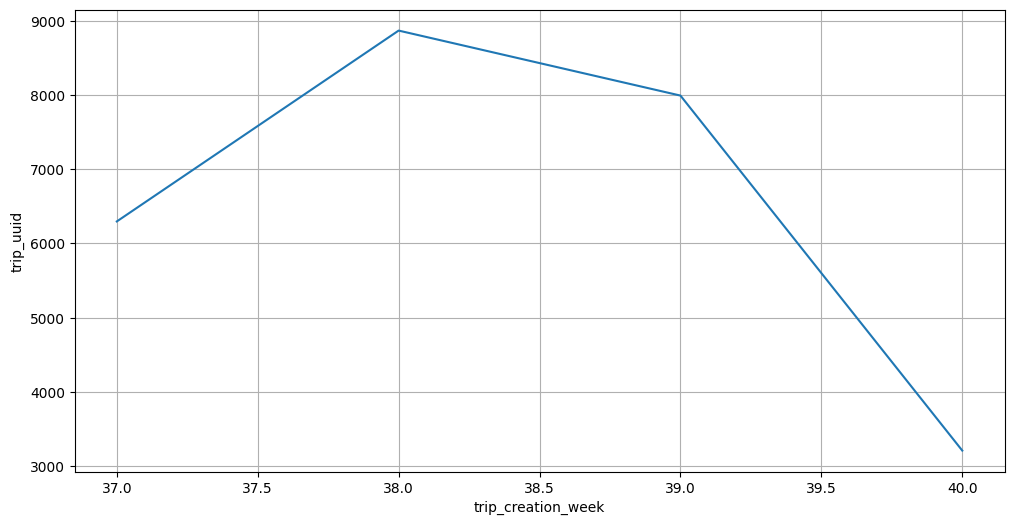

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'trip_creation_week', y = 'trip_uuid', data = dt_week)
plt.grid('both')
plt.plot()

It can be inferred from the above plot that most of the trips are created in the 38th week.

I am intrested to know how many trips are created in the given two months

In [ ]:
dt_month = df2.groupby('trip_creation_month')['trip_uuid'].count().reset_index()
dt_month['prec'] = np.round((dt_month['trip_uuid']/(dt_month['trip_uuid'].sum()))*100, 2)
dt_month.head()

,trip_creation_month,trip_uuid,prec
0,9,23159,87.83
1,10,3209,12.17


[]

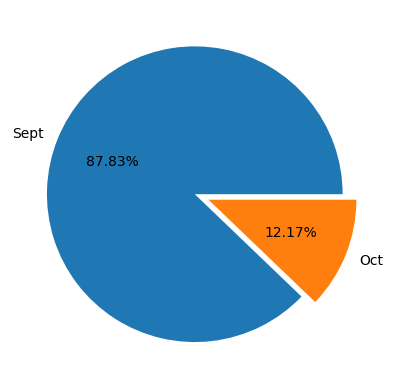

In [ ]:
plt.pie(
    x = dt_month['trip_uuid'],
    labels = ['Sept', 'Oct'],
    explode = [0, 0.1],
    autopct = '%.2f%%'
)
plt.plot()

I am interested to know the distribution of trip data for the orders

In [ ]:
df_data = df2.groupby(by = 'data')['trip_uuid'].count().to_frame().reset_index()
df_data['perc'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
df_data.head()

,data,trip_uuid,perc
0,test,7421,28.14
1,training,18947,71.86


[]

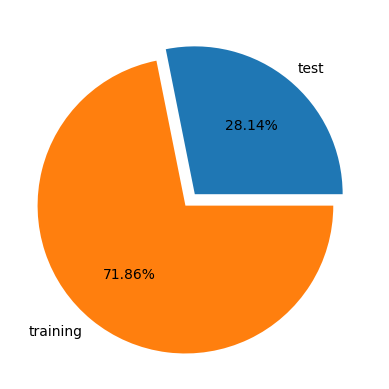

In [ ]:
plt.pie(x = df_data['trip_uuid'],
        labels = df_data['data'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

In [ ]:
df_route = df2.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,12429,47.14
1,FTL,13939,52.86


[]

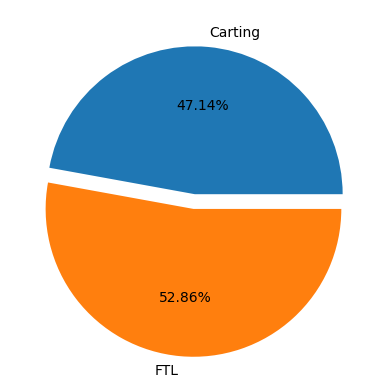

In [ ]:
plt.pie(x = df_route['trip_uuid'],
        labels = ['Carting', 'FTL'],
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

I am interested to know what is the distribution of number of trips created from different states

In [ ]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,3565,13.52
14,Karnataka,3453,13.10
25,Tamil Nadu,2130,8.08
10,Haryana,2056,7.80
29,Uttar Pradesh,1832,6.95


[]

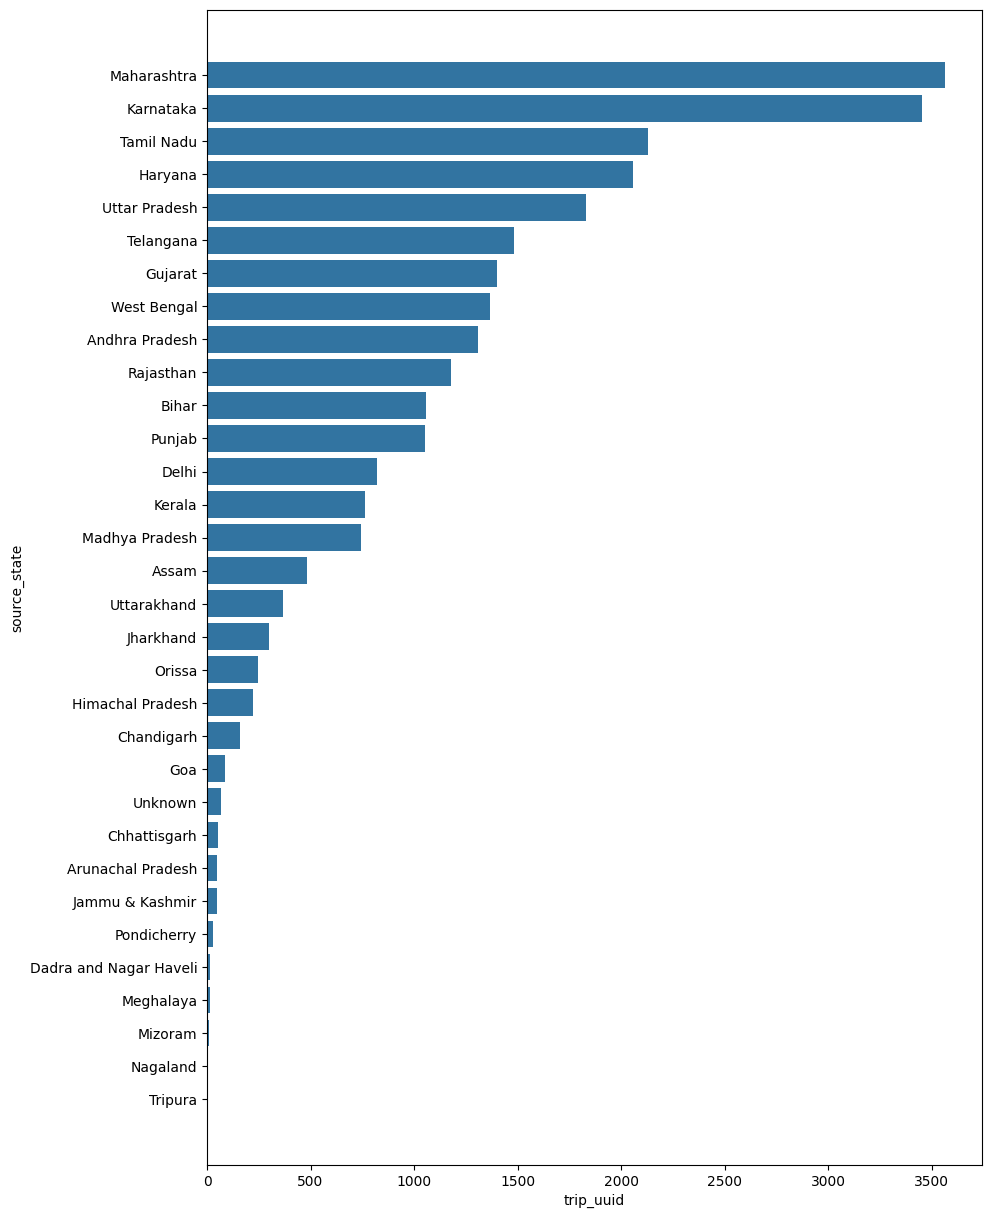

In [ ]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state,
            x = df_source_state['trip_uuid'],
            y = df_source_state['source_state'])
plt.plot()

- It can be seen in the above plot that maximum trips originated from Maharashtra state followed by Karnataka and Haryana. That means that the seller base is strong in these states

In [ ]:
df_source_city = df2.groupby(by = 'source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['perc'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_source_city

,source_city,trip_uuid,perc
425,Gurgaon,1141,4.33
140,Bengaluru,1136,4.31
172,Bhiwandi,821,3.11
102,Bangalore,792,3.00
784,Mumbai,719,2.73
303,Delhi,629,2.39
470,Hyderabad,575,2.18
235,Chandigarh,529,2.01
960,Pune,490,1.86
242,Chennai,400,1.52


[]

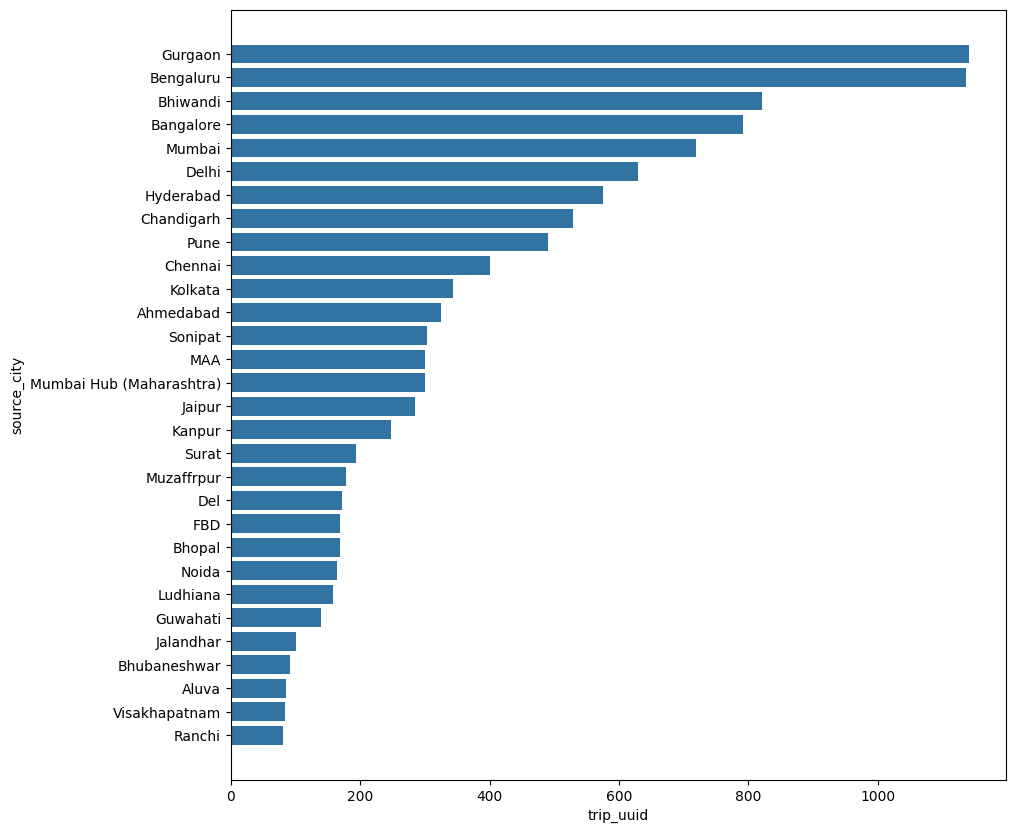

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_source_city,
            x = df_source_city['trip_uuid'],
            y = df_source_city['source_city'])
plt.plot()

It can be seen that the maximum trips originated from Gurgaon, followed by Bengaluru, Bhiwandi, and so on.

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df_corr = df2[numerical_columns].corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,1.000000,0.906263,0.954472,0.911194,0.911358,0.954458,0.904393,0.908119
start_scan_to_end_scan,1.000000,1.000000,0.906266,0.954473,0.911197,0.911361,0.954460,0.904397,0.908123
actual_distance_to_destination,0.906263,0.906266,1.000000,0.948995,0.994893,0.997217,0.947989,0.987161,0.992742
actual_time,0.954472,0.954473,0.948995,1.000000,0.953152,0.953845,0.999988,0.947958,0.952183
osrm_time,0.911194,0.911197,0.994893,0.953152,1.000000,0.998384,0.952218,0.992269,0.992677
osrm_distance,0.911358,0.911361,0.997217,0.953845,0.998384,1.000000,0.952905,0.990975,0.994311
segment_actual_time,0.954458,0.954460,0.947989,0.999988,0.952218,0.952905,1.000000,0.947032,0.951255
segment_osrm_time,0.904393,0.904397,0.987161,0.947958,0.992269,0.990975,0.947032,1.000000,0.996500
segment_osrm_distance,0.908119,0.908123,0.992742,0.952183,0.992677,0.994311,0.951255,0.996500,1.000000


[]

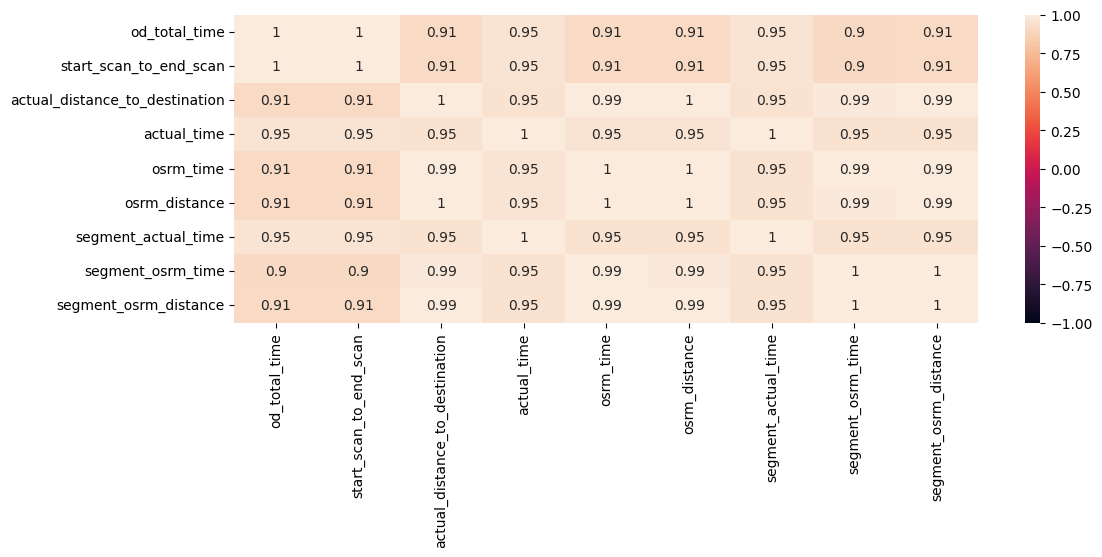

In [ ]:
plt.figure(figsize = (12, 4))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.plot()

Very High Correlation (> 0.9) exists between columns all the numerical columns specified above

### Outlier Detection & Treatment

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,26368.0,298.777449,440.561188,20.700000,91.032500,152.520000,307.102500,7898.550000
start_scan_to_end_scan,26368.0,298.278656,440.561584,20.000000,91.000000,152.000000,307.000000,7898.000000
actual_distance_to_destination,26368.0,92.425209,209.415039,9.001351,21.684418,35.114229,65.750725,1927.447754
actual_time,26368.0,200.690186,384.853638,9.000000,51.000000,84.000000,168.000000,4532.000000
osrm_time,26368.0,90.686707,185.080414,6.000000,25.000000,39.000000,72.000000,1686.000000
osrm_distance,26368.0,114.827644,253.773773,9.072900,27.764724,43.633049,85.566973,2326.199219
segment_actual_time,26368.0,198.863098,381.283234,9.000000,50.000000,83.000000,166.000000,4504.000000
segment_osrm_time,26368.0,101.681320,215.650955,6.000000,25.000000,42.000000,79.000000,1938.000000
segment_osrm_distance,26368.0,125.423676,285.932556,9.072900,28.471300,45.944401,91.351978,2640.924805


In [ ]:
import matplotlib as mpl

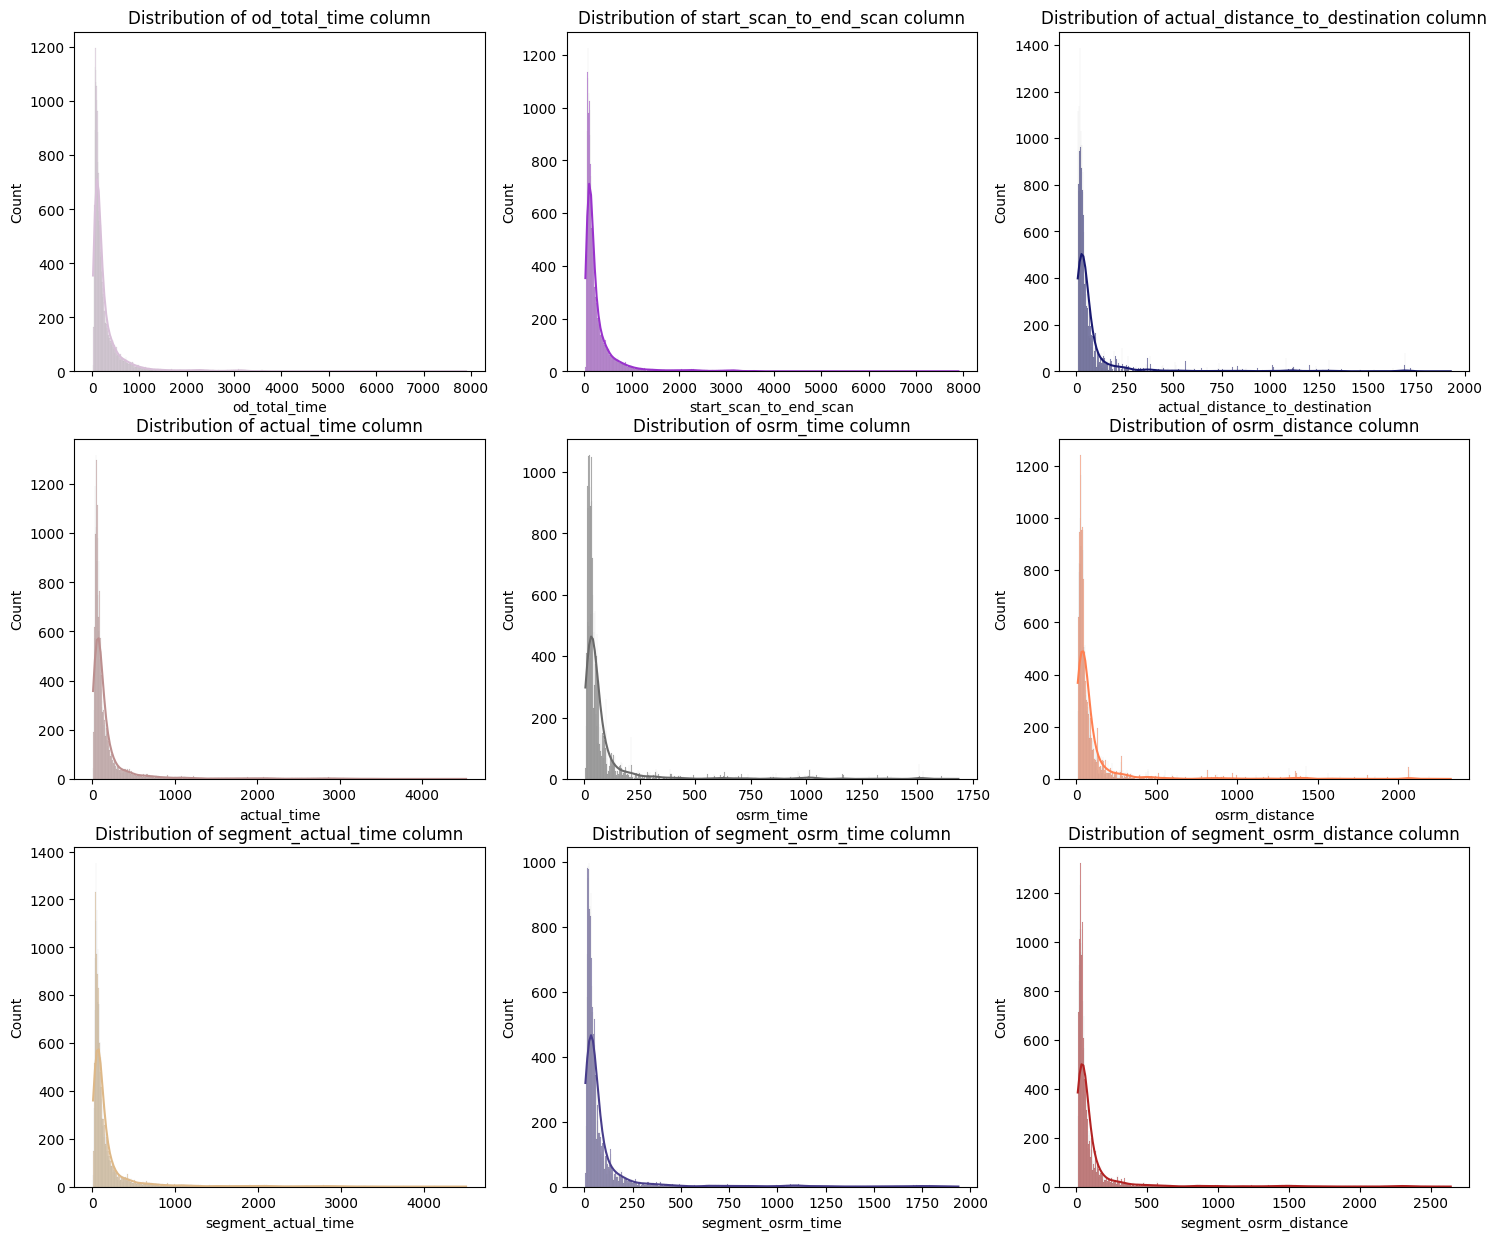

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.histplot(df2[numerical_columns[i]], bins = 1000, kde = True, color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

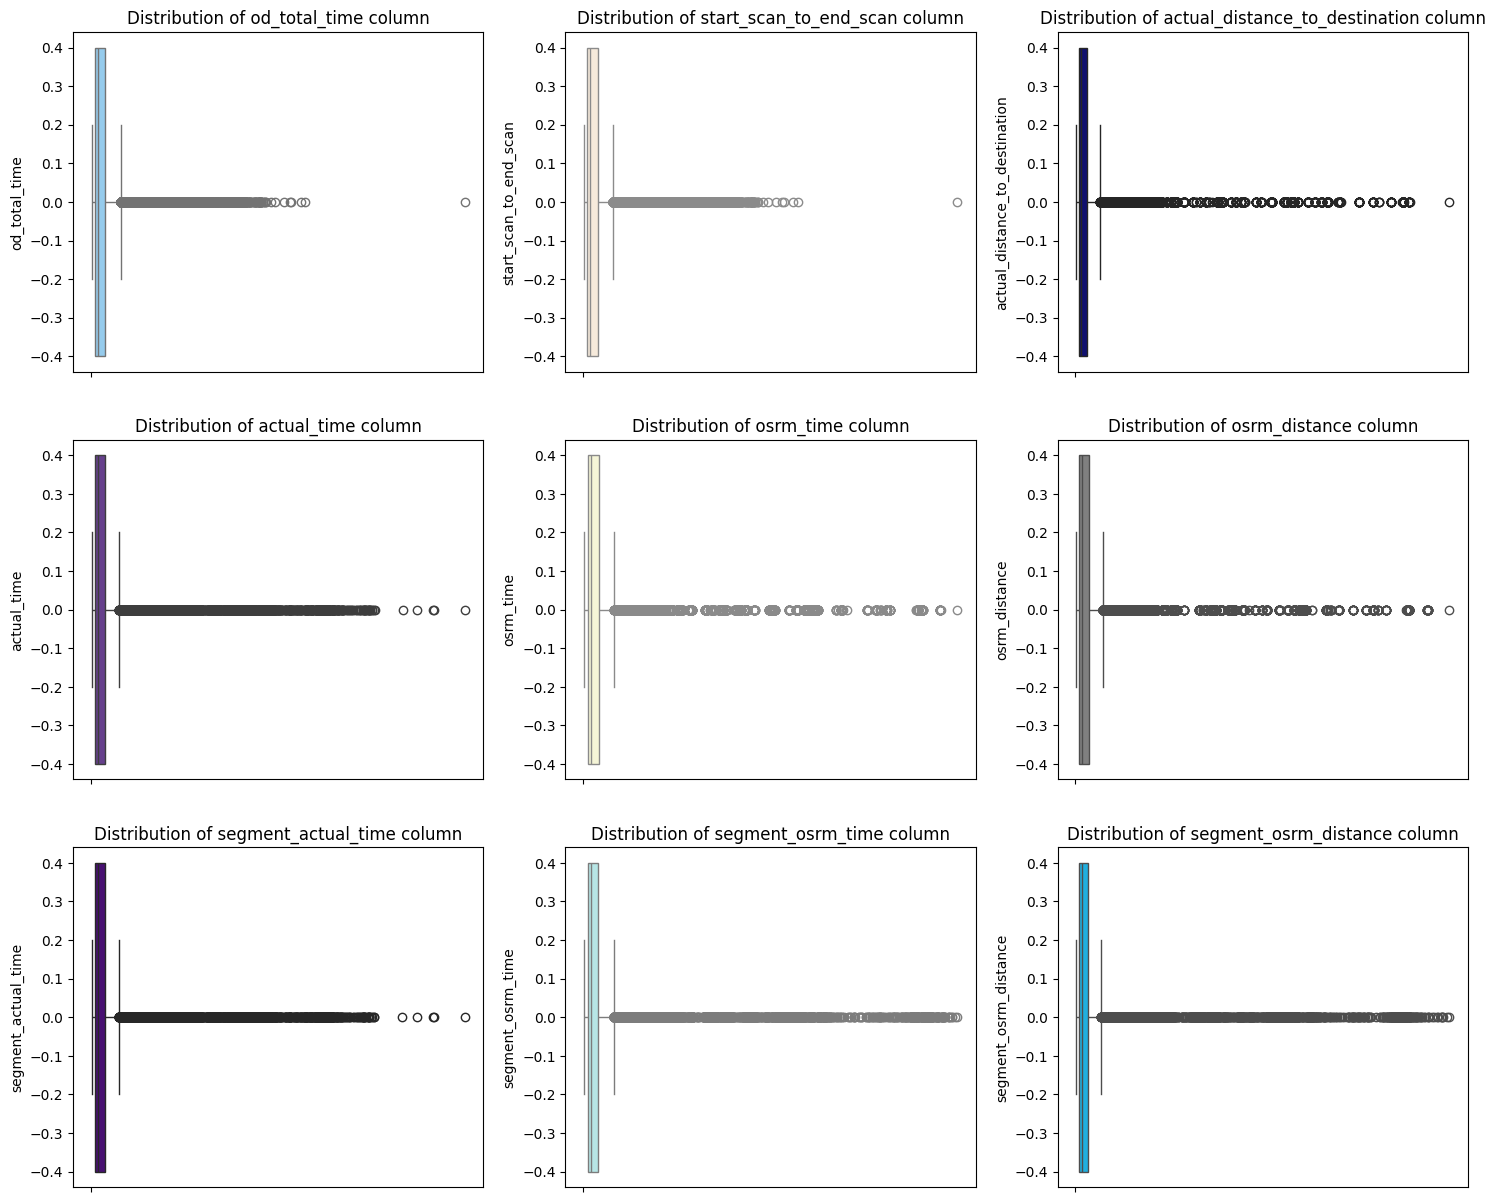

In [ ]:
plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df2[numerical_columns[i]], color = clr, vert = False)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

- It can be clearly seen in the above plots that there are outliers in all the numerical columns that need to be treated.

In [ ]:
# Detecting Outliers
for i in numerical_columns:
  Q1 = np.quantile(df2[i], 0.25)
  Q3 = np.quantile(df2[i], 0.75)
  IQR = Q3 - Q1
  LB = Q1 - 1.5*IQR
  UB = Q3 + 1.5*IQR
  outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB)]
  print('Column :', i)
  print(f'Q1 : {Q1}')
  print(f'Q3 : {Q3}')
  print(f'IQR : {IQR}')
  print(f'LB : {LB}')
  print(f'UB : {UB}')
  print(f'Number of outliers : {outliers.shape[0]}')
  print('----------------------------------')

Column : od_total_time
Q1 : 91.0325
Q3 : 307.10249999999996
IQR : 216.06999999999996
LB : -233.07249999999996
UB : 631.2075
Number of outliers : 2727
----------------------------------
Column : start_scan_to_end_scan
Q1 : 91.0
Q3 : 307.0
IQR : 216.0
LB : -233.0
UB : 631.0
Number of outliers : 2721
----------------------------------
Column : actual_distance_to_destination
Q1 : 21.684418201446533
Q3 : 65.75072479248047
IQR : 44.066306591033936
LB : -44.41504168510437
UB : 131.85018467903137
Number of outliers : 3292
----------------------------------
Column : actual_time
Q1 : 51.0
Q3 : 168.0
IQR : 117.0
LB : -124.5
UB : 343.5
Number of outliers : 3152
----------------------------------
Column : osrm_time
Q1 : 25.0
Q3 : 72.0
IQR : 47.0
LB : -45.5
UB : 142.5
Number of outliers : 2919
----------------------------------
Column : osrm_distance
Q1 : 27.764724254608154
Q3 : 85.56697273254395
IQR : 57.80224847793579
LB : -58.93864846229553
UB : 172.27034544944763
Number of outliers : 3098
------

### Perform one-hot encoding on categorical features.

In [ ]:
df2['route_type'].value_counts()

,count
route_type,
FTL,13939
Carting,12429


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])

In [ ]:
df2['route_type'].value_counts()

,count
route_type,
1,13939
0,12429


In [ ]:
df2['data'].value_counts()

,count
data,
training,18947
test,7421


In [ ]:
df2['data'] = label_encoder.fit_transform(df2['data'])
df2['data'].value_counts()

,count
data,
1,18947
0,7421


### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

[]

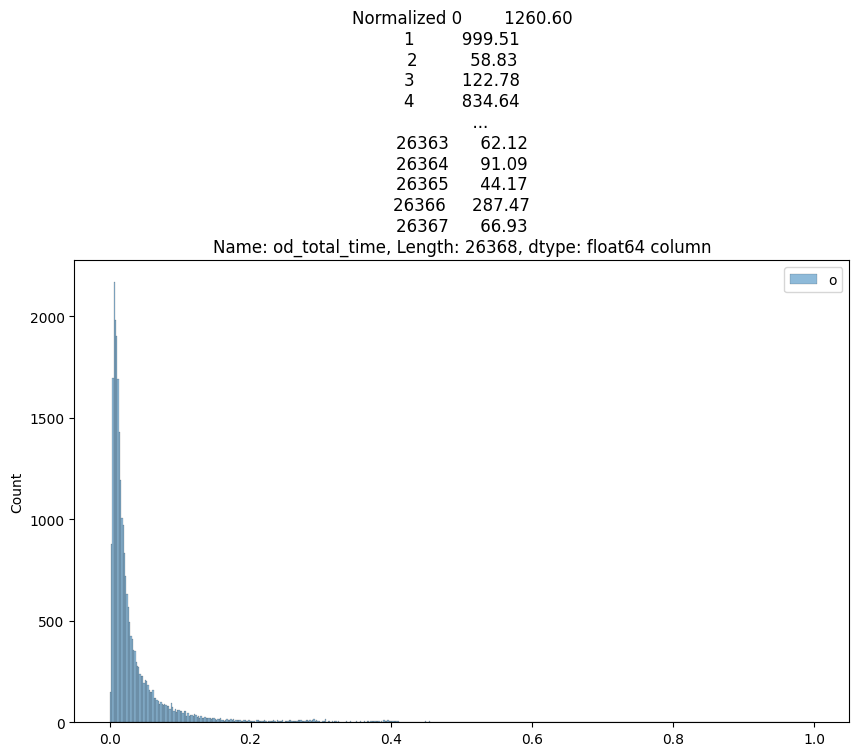

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

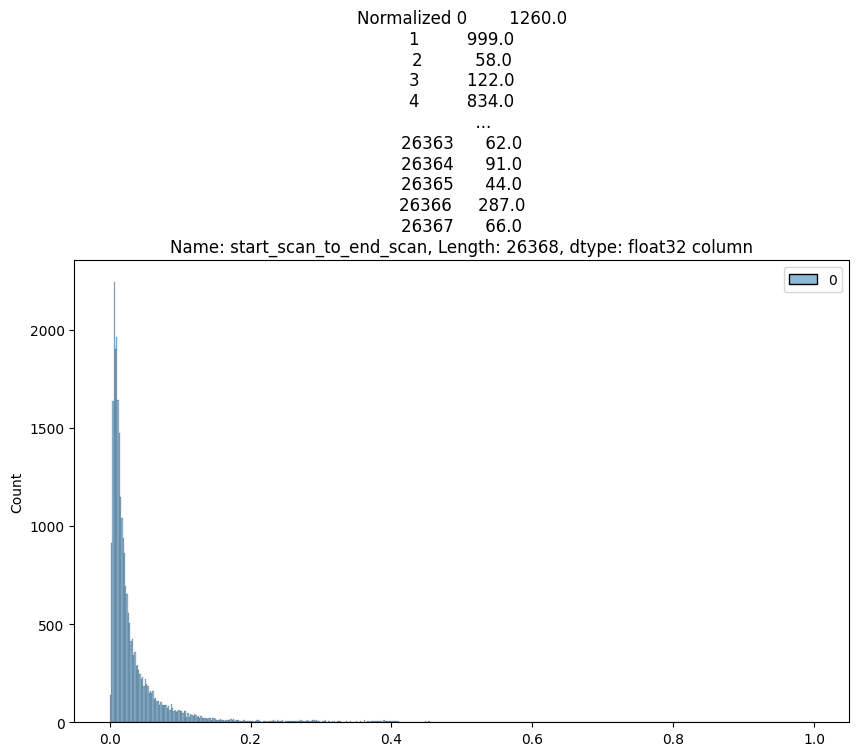

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

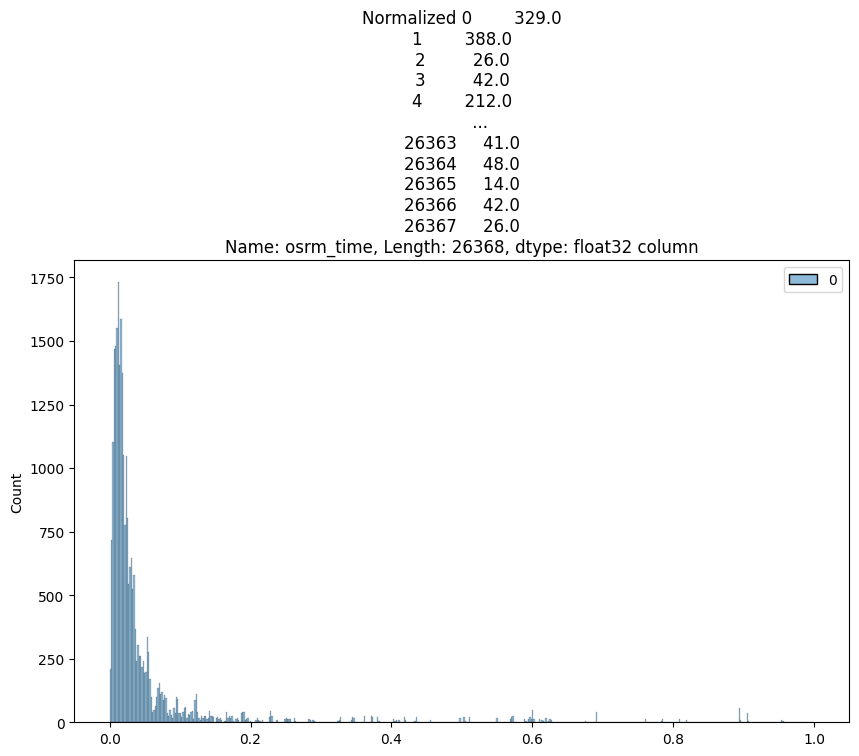

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['osrm_time']} column")
plt.plot()

[]

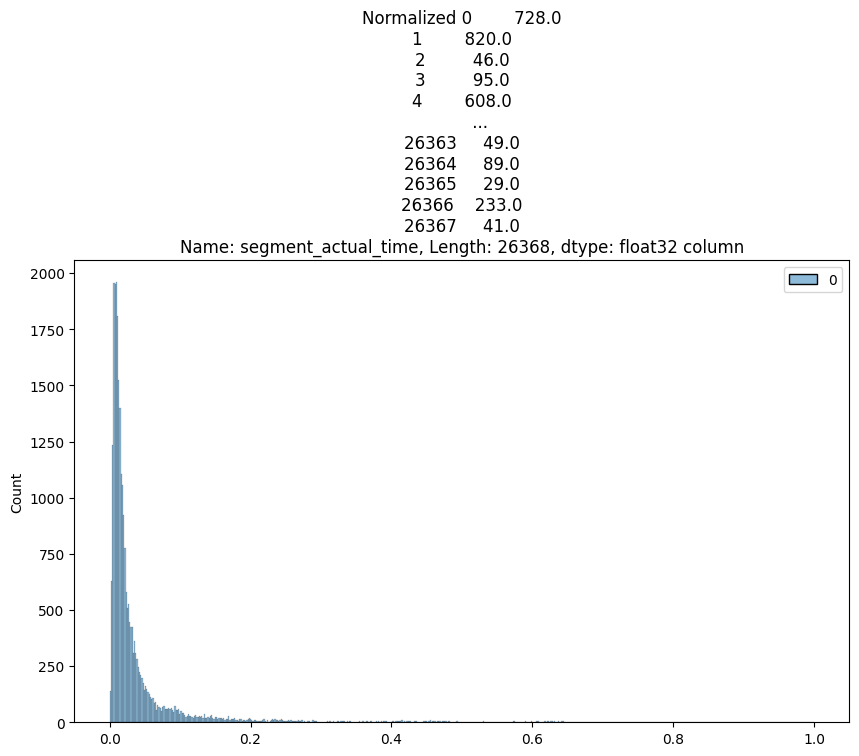

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_actual_time']} column")
plt.plot()

[]

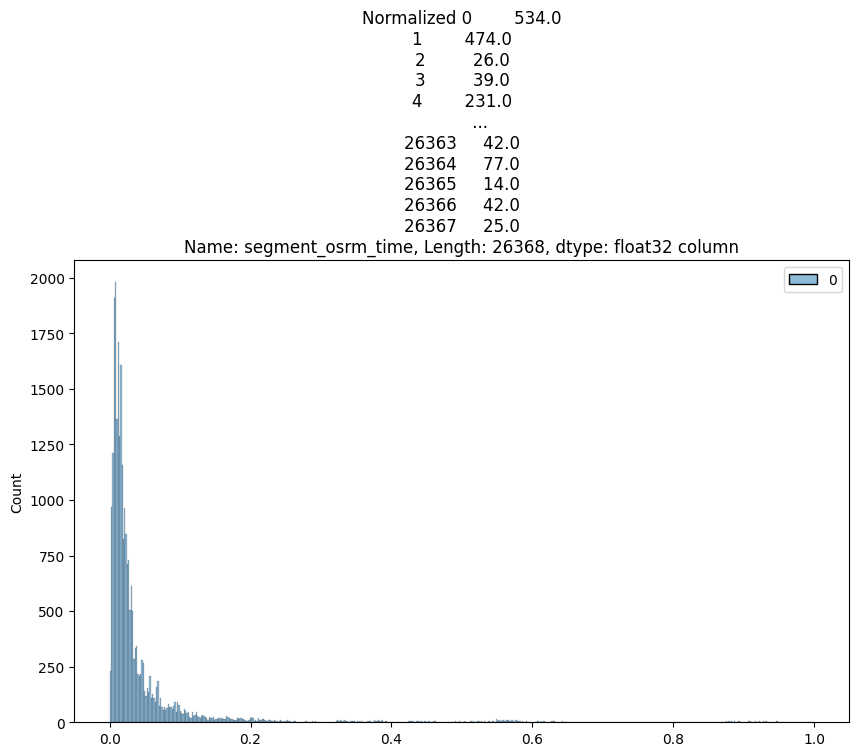

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_time']} column")
plt.plot()

[]

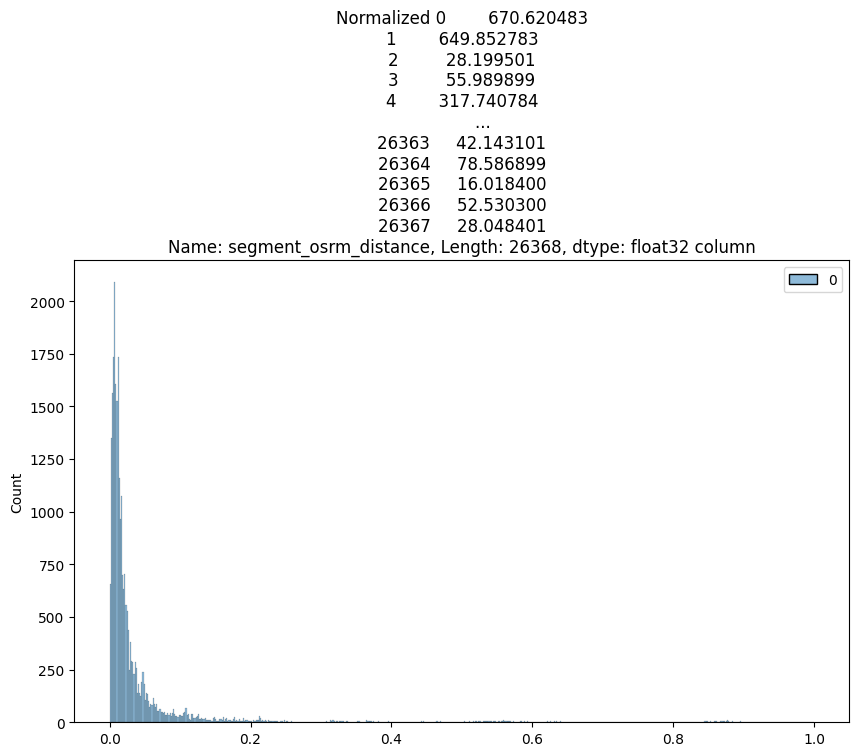

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['segment_osrm_distance']} column")
plt.plot()

#### Column Standardization

[]

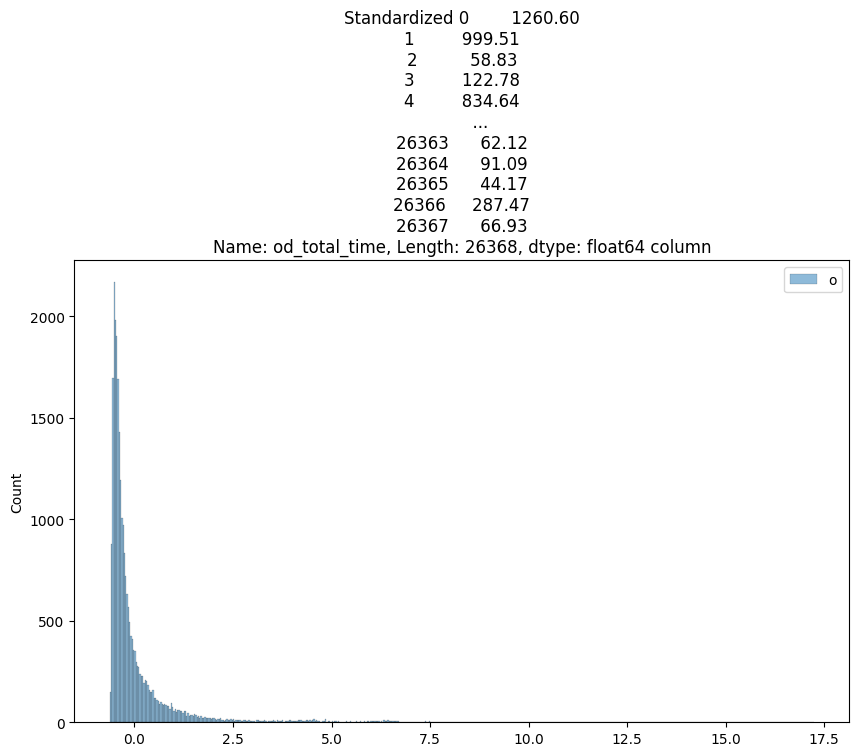

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['od_total_time']} column")
plt.legend('od_total_time')
plt.plot()

[]

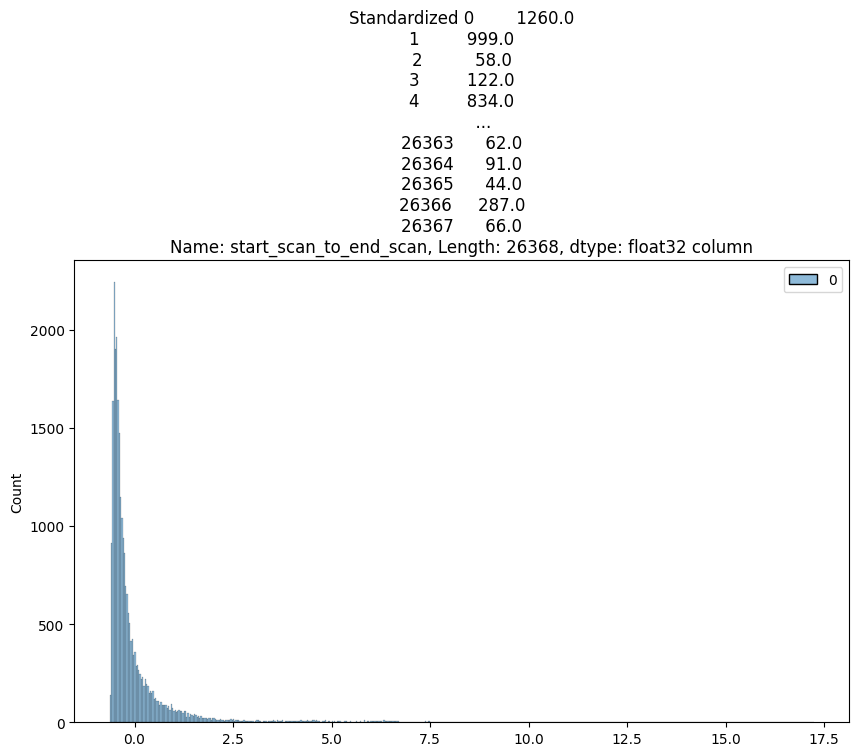

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['start_scan_to_end_scan']} column")
plt.plot()

[]

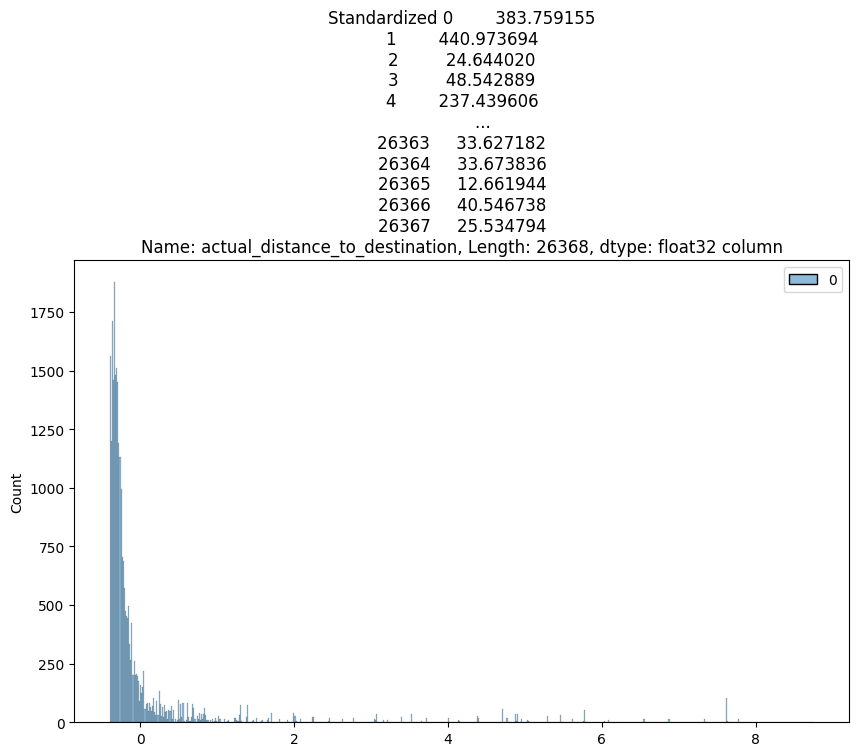

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_distance_to_destination']} column")
plt.plot()

[]

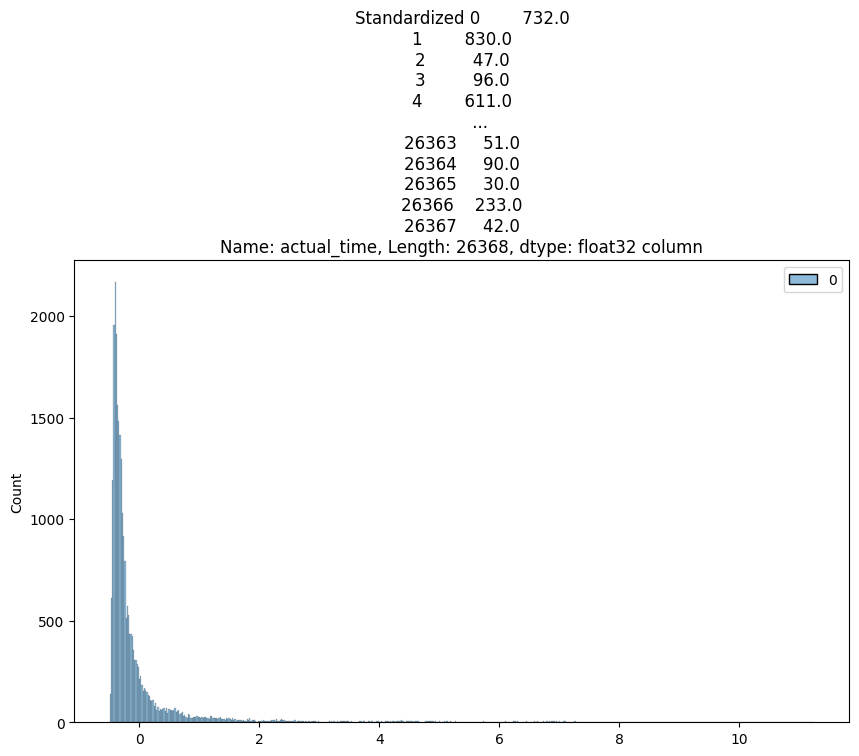

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.plot()

[]

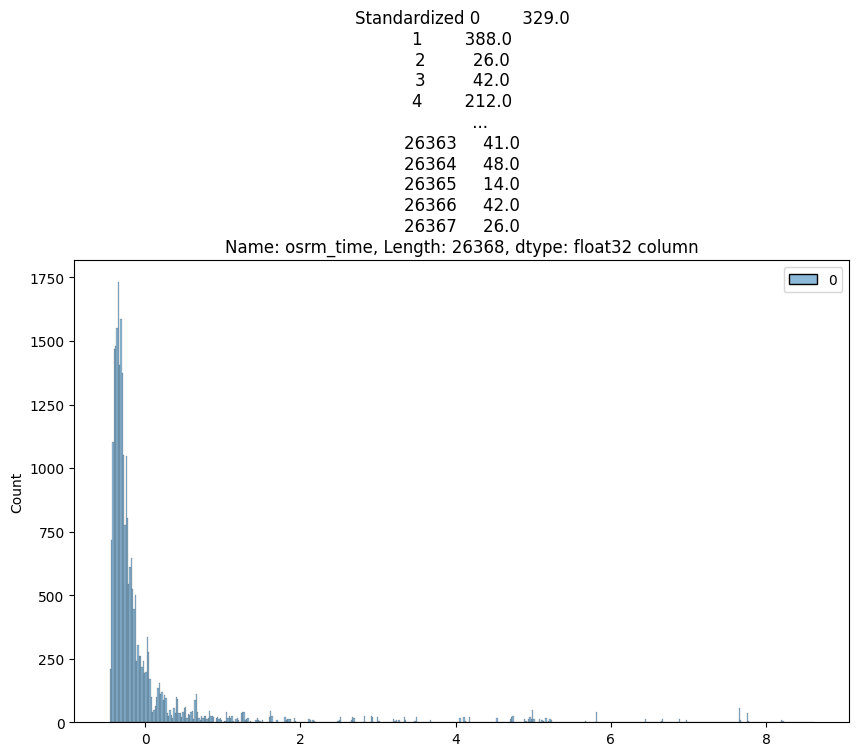

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['osrm_time']} column")
plt.plot()

[]

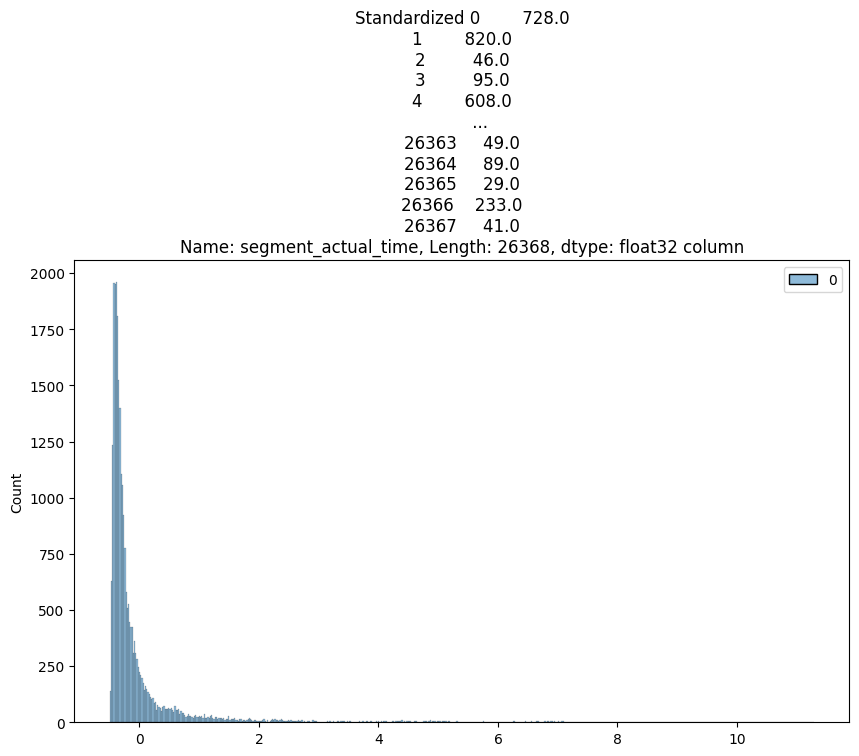

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_actual_time']} column")
plt.plot()

[]

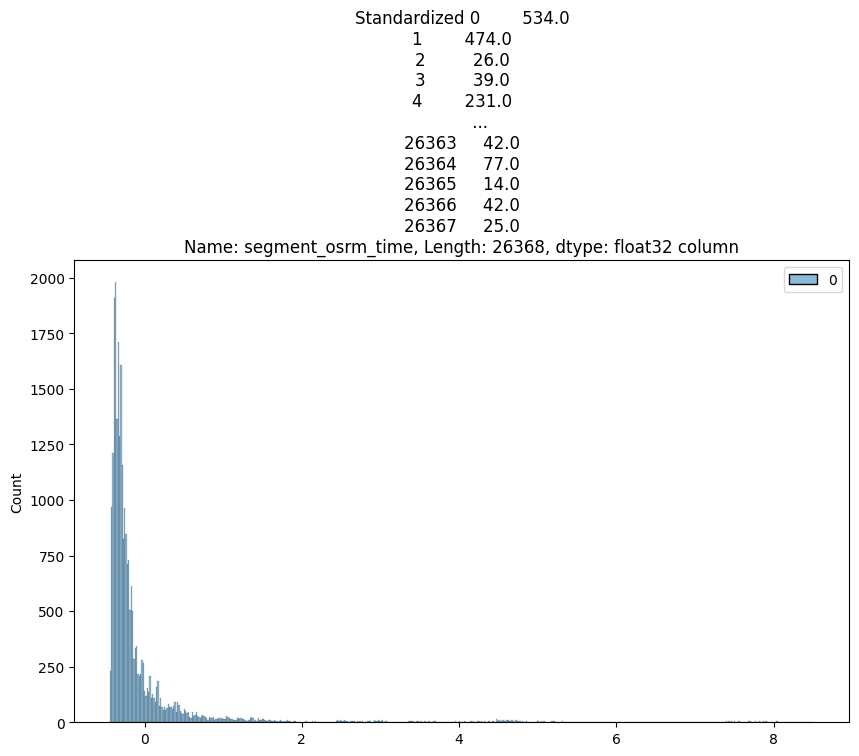

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_time']} column")
plt.plot()

[]

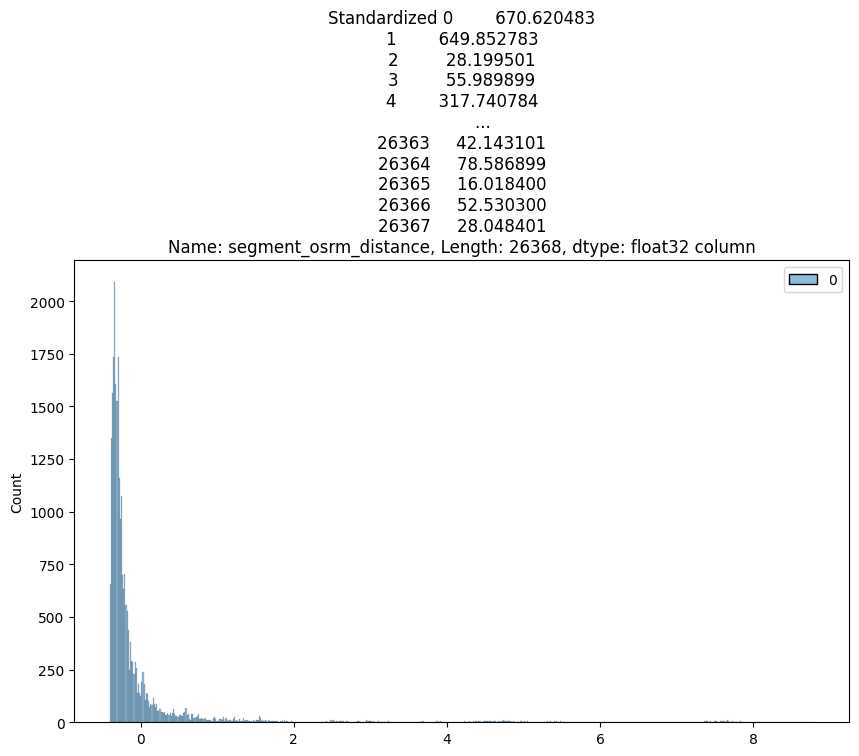

In [ ]:
plt.figure(figsize = (10, 6))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['segment_osrm_distance'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['segment_osrm_distance']} column")
plt.plot()

## Hypothesis Testing

### actual_time aggregated value and OSRM time aggregated value.

In [ ]:
df2[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,26368.000000,26368.000000
mean,200.690186,90.686707
std,384.853638,185.080414
min,9.000000,6.000000
25%,51.000000,25.000000
50%,84.000000,39.000000
75%,168.000000,72.000000
max,4532.000000,1686.000000


[]

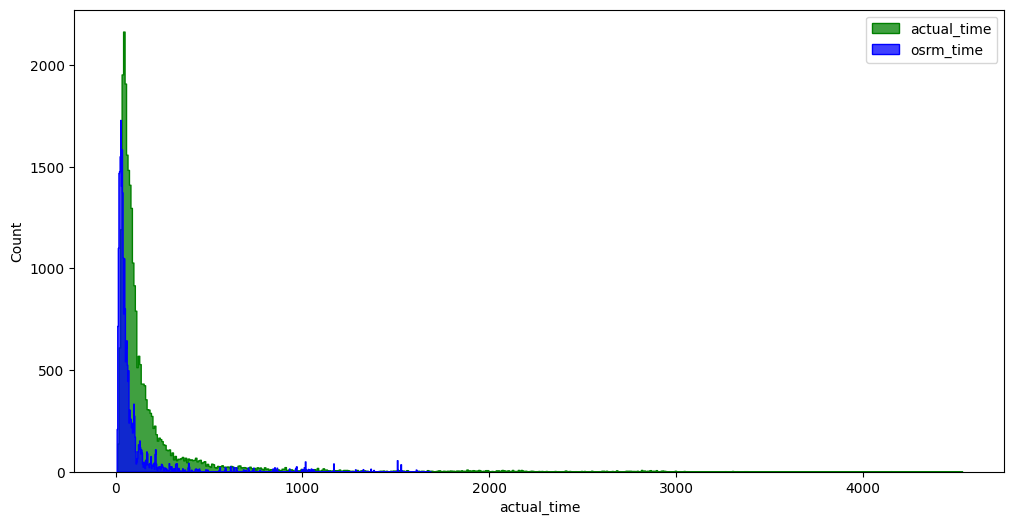

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(df2['actual_time'], element = 'step', color = 'green')
sns.histplot(df2['osrm_time'], element = 'step', color = 'blue')
plt.legend(['actual_time', 'osrm_time'])
plt.plot()

Distribution check using **QQ Plot**

In [ ]:
import scipy.stats as spy

[]

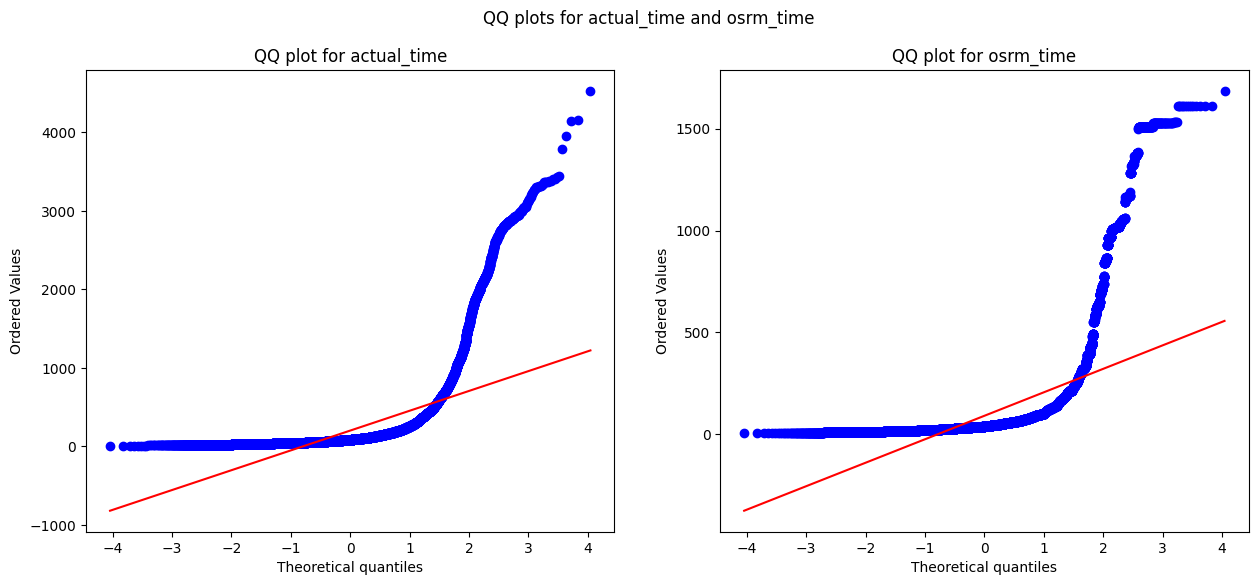

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

It can be seen that the samples do not form normal distribution. However we will also apply the shapiro wilk test for normality. <br>H0: The sample follows normal distribution. <br>H1: The sample does not follow normal distribution.

In [ ]:
t_stat, p_val = spy.shapiro(df2['actual_time'])
print('p_value: ' ,p_val)
if p_val < 0.05:
  print('The sample does not follow normal distribution')
else:
  print('The sample follows normal distribution')

p_value:  1.3001852400463635e-127
The sample does not follow normal distribution


In [ ]:
t_stat, p_val = spy.shapiro(df2['osrm_time'])
print('p_value: ' ,p_val)
if p_val < 0.05:
  print('The sample does not follow normal distribution')
else:
  print('The sample follows normal distribution')

p_value:  9.870798095393527e-130
The sample does not follow normal distribution


Since the samples do not follow any of the assumptions T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.0
The samples are not similar


Since p-value < alpha therfore it can be concluded that actual_time and osrm_time are not similar.

### actual_time aggregated value and segment actual time aggregated value.

In [ ]:
df2[['actual_time', 'segment_actual_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,26368.0,200.690186,384.853638,9.0,51.0,84.0,168.0,4532.0
segment_actual_time,26368.0,198.863098,381.283234,9.0,50.0,83.0,166.0,4504.0


- Visual Tests to know if the samples follow normal distribution

[]

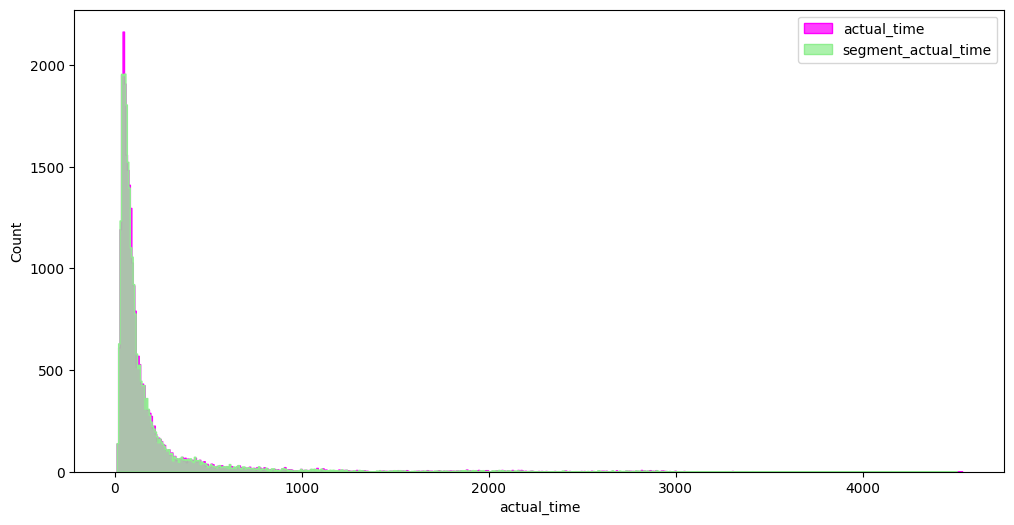

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['actual_time'], element = 'step', color = 'magenta')
sns.histplot(df2['segment_actual_time'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

- Distribution check using QQ Plot

[]

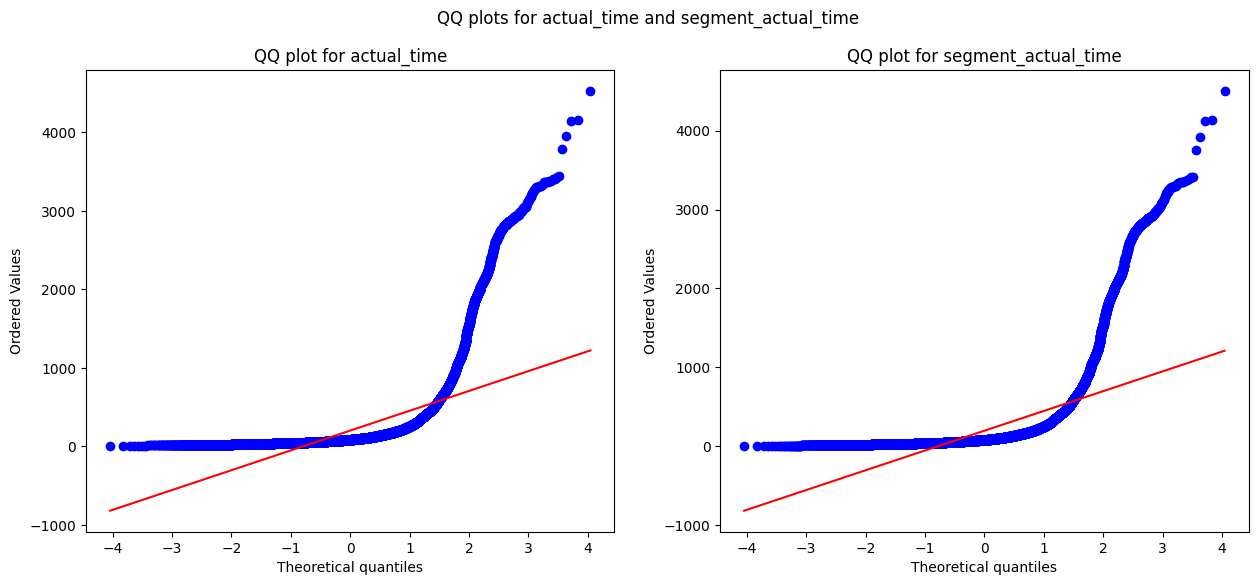

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

It can be seen that the samples do not form normal distribution. However we will also apply the shapiro wilk test for normality. <br>H0: The sample follows normal distribution. <br>H1: The sample does not follow normal distribution.

In [ ]:
test_stat, p_value = spy.shapiro(df2['actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.3001852400463635e-127
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.3756253436920972e-127
The sample does not follow normal distribution


Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.16011376950109157
The samples are similar 


Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

### OSRM distance aggregated value and segment OSRM distance aggregated value.

In [ ]:
df2[['osrm_distance', 'segment_osrm_distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,26368.0,114.827644,253.773773,9.0729,27.764724,43.633049,85.566973,2326.199219
segment_osrm_distance,26368.0,125.423676,285.932556,9.0729,28.471300,45.944401,91.351978,2640.924805


[]

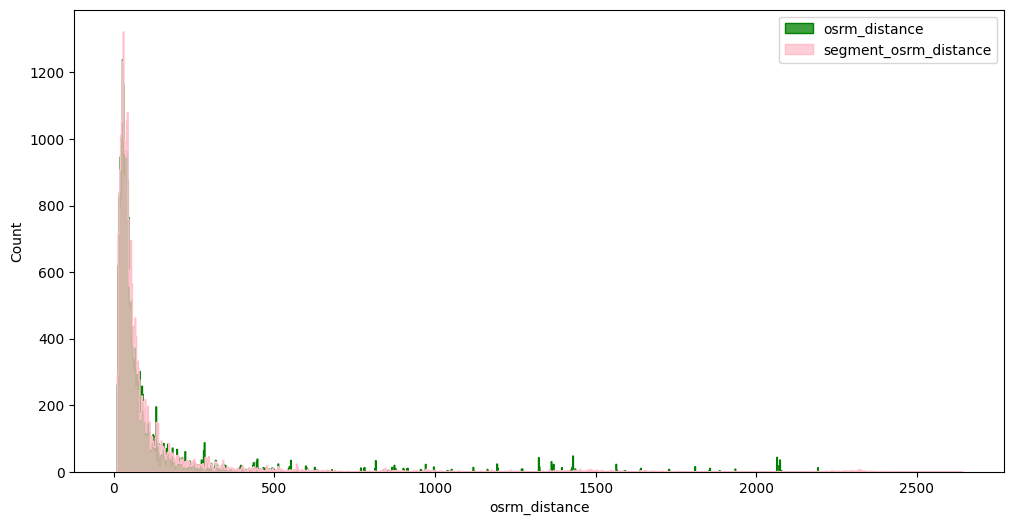

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_distance'], element = 'step', color = 'green', bins = 1000)
sns.histplot(df2['segment_osrm_distance'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

[]

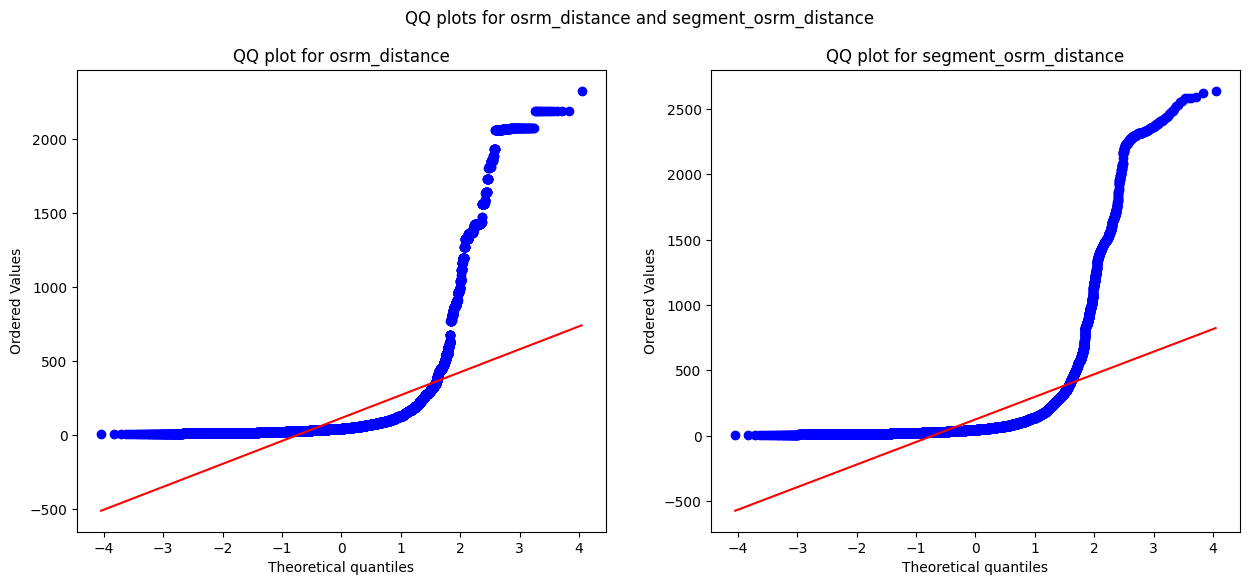

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9708112004834723e-130
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.495019218301228e-131
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 3.715878161440578e-10
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

### OSRM time aggregated value and segment OSRM time aggregated value.

In [ ]:
df2[['osrm_time', 'segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,26368.0,90.686707,185.080414,6.0,25.0,39.0,72.0,1686.0
segment_osrm_time,26368.0,101.681320,215.650955,6.0,25.0,42.0,79.0,1938.0


[]

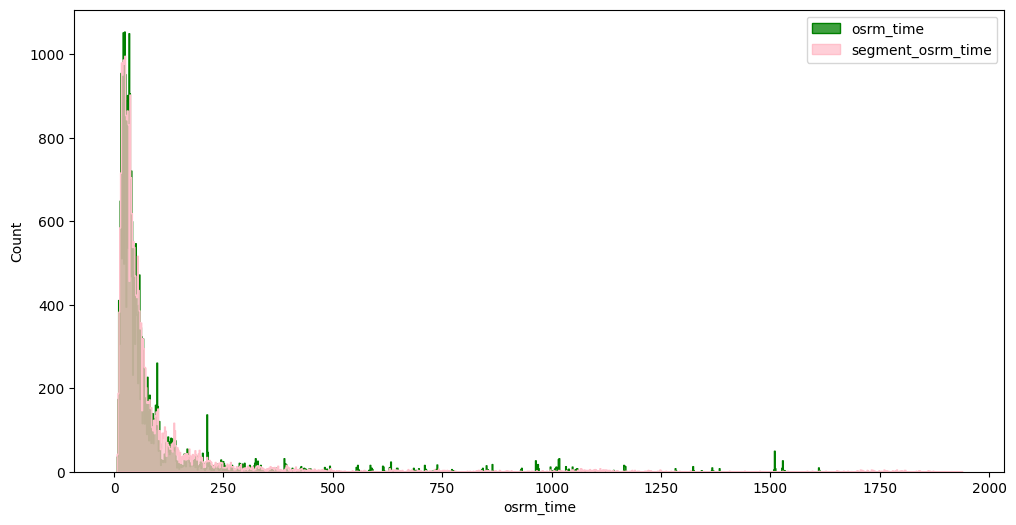

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df2['osrm_time'], element = 'step', color = 'green', bins = 1000)
sns.histplot(df2['segment_osrm_time'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

[]

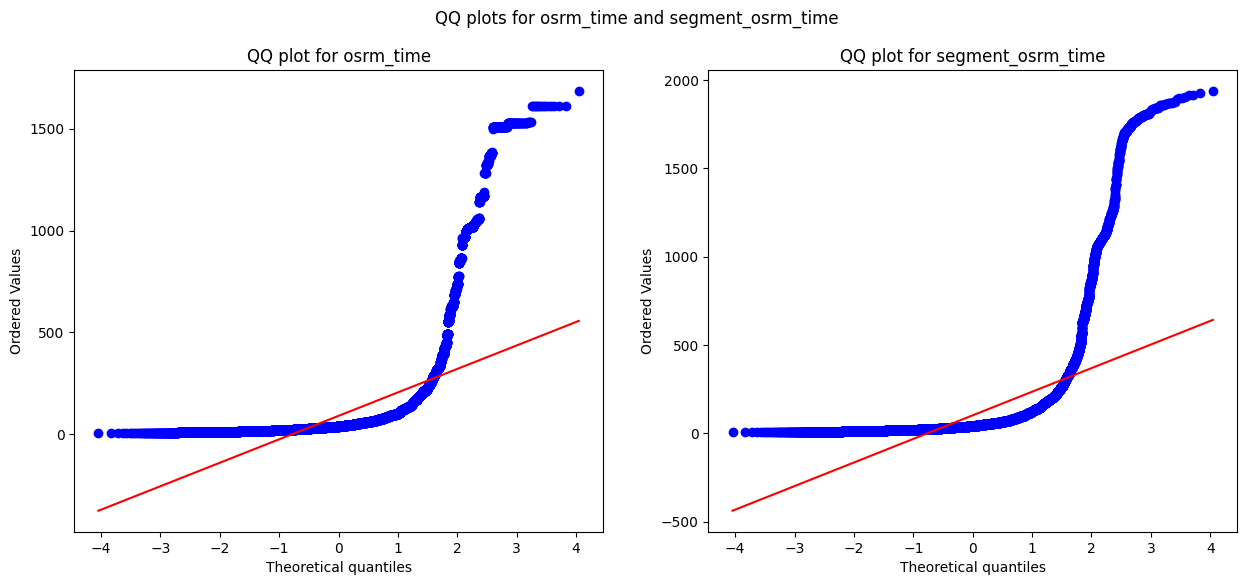

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

It can be seen that the samples do not form normal distribution. However we will also apply the shapiro wilk test for normality.
<br>H0: The sample follows normal distribution.
<br>H1: The sample does not follow normal distribution.

In [ ]:
test_stat, p_value = spy.shapiro(df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.870798095393527e-130
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.934812956930288e-85
The sample does not follow normal distribution


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [ ]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 2.3417605478672297e-11
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

## Business Insights
- The data is given from the period '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
- Most of the data is for testing than for training.
- Most common route type is Carting.
- Maximum trips are created in the 38th week.
- Most orders come mid-month. That means customers usually make more orders in the mid of the month.
- Features actual_time & osrm_time are statitically different.
- Features start_scan_to_end_scan and segment_actual_time are statistically similar.
- Features osrm_distance and segment_osrm_distance are statistically different from each other.
- Both the osrm_time & segment_osrm_time are not statistically same.

## Recommendations
- The OSRM trip planning system needs to be improved. Discrepancies need to be catered to for transporters, if the routing engine is configured for optimum results.
- osrm_time and actual_time are different. Team needs to make sure this difference is reduced, so that better delivery time prediction can be made and it becomes convenient for the customer to expect an accurate delivery time.
- The osrm distance and actual distance covered are also not same i.e. maybe the delivery person is not following the predefined route which may lead to late deliveries or the osrm devices is not properly predicting the route based on distance, traffic and other factors. Team needs to look into it.
- Most of the orders are coming from/reaching to states like Maharashtra, Karnataka, Haryana and Tamil Nadu. The existing corridors can be further enhanced to improve the penetration in these areas.

In [ ]:
!apt-get install pandoc
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/Business_Case_Delhivery_Feature_Engineering.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc nodejs php python
  libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pandoc-